In [ ]:
pip install fbprophet

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
from sklearn.metrics import mean_absolute_error as MAE
from scipy.stats import skew
import fbprophet
Prophet = fbprophet.Prophet

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import performance_metrics

import sys


C:\Users\deepa\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
features = pd.read_csv('features.csv.zip')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv.zip')
train = pd.read_csv('train.csv.zip')
train = train.drop(columns=['IsHoliday'],axis = 1)
features.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [3]:
train.()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 12.9+ MB


In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [5]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [6]:
store_features = stores.merge(features,on = 'Store',how = 'inner')
store_data = train.merge(store_features,on = ['Store','Date'],how = 'right')

In [7]:
store_data.columns
dataset = store_data.drop(columns = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5','Unemployment'],axis = 1)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'],
      dtype='object')

In [8]:
dataset.corr()

Store      Dept  Weekly_Sales      Size  Temperature  \
Store         1.000000  0.024004     -0.085195 -0.183170    -0.050010   
Dept          0.024004  1.000000      0.148032 -0.002966     0.004437   
Weekly_Sales -0.085195  0.148032      1.000000  0.243828    -0.002312   
Size         -0.183170 -0.002966      0.243828  1.000000    -0.058354   
Temperature  -0.050010  0.004437     -0.002312 -0.058354     1.000000   
Fuel_Price    0.065511  0.003572     -0.000120  0.003284     0.142966   
CPI          -0.211049 -0.007477     -0.020921 -0.003380     0.181789   
IsHoliday    -0.000539  0.000916      0.012774  0.000579    -0.156080   

              Fuel_Price       CPI  IsHoliday  
Store           0.065511 -0.211049  -0.000539  
Dept            0.003572 -0.007477   0.000916  
Weekly_Sales   -0.000120 -0.020921   0.012774  
Size            0.003284 -0.003380   0.000579  
Temperature     0.142966  0.181789  -0.156080  
Fuel_Price      1.000000 -0.164460  -0.078261  
CPI            -0.164460  1.000000  -0.001869  
IsHoliday      -0.078261 -0.001869   1.000000

In [15]:
Store1

Date  Store  Dept         CPI  Temperature  Fuel_Price  \
0       2010-02-05      1   1.0  211.096358        42.31       2.572   
1       2010-02-05      1   2.0  211.096358        42.31       2.572   
2       2010-02-05      1   3.0  211.096358        42.31       2.572   
3       2010-02-05      1   4.0  211.096358        42.31       2.572   
4       2010-02-05      1   5.0  211.096358        42.31       2.572   
5       2010-02-05      1   6.0  211.096358        42.31       2.572   
6       2010-02-05      1   7.0  211.096358        42.31       2.572   
7       2010-02-05      1   8.0  211.096358        42.31       2.572   
8       2010-02-05      1   9.0  211.096358        42.31       2.572   
9       2010-02-05      1  10.0  211.096358        42.31       2.572   
10      2010-02-05      1  11.0  211.096358        42.31       2.572   
11      2010-02-05      1  12.0  211.096358        42.31       2.572   
12      2010-02-05      1  13.0  211.096358        42.31       2.572   
13      2010-02-05      1  14.0  211.096358        42.31       2.572   
14      2010-02-05      1  16.0  211.096358        42.31       2.572   
15      2010-02-05      1  17.0  211.096358        42.31       2.572   
16      2010-02-05      1  18.0  211.096358        42.31       2.572   
17      2010-02-05      1  19.0  211.096358        42.31       2.572   
18      2010-02-05      1  20.0  211.096358        42.31       2.572   
19      2010-02-05      1  21.0  211.096358        42.31       2.572   
20      2010-02-05      1  22.0  211.096358        42.31       2.572   
21      2010-02-05      1  23.0  211.096358        42.31       2.572   
22      2010-02-05      1  24.0  211.096358        42.31       2.572   
23      2010-02-05      1  25.0  211.096358        42.31       2.572   
24      2010-02-05      1  26.0  211.096358        42.31       2.572   
25      2010-02-05      1  27.0  211.096358        42.31       2.572   
26      2010-02-05      1  28.0  211.096358        42.31       2.572   
27      2010-02-05      1  29.0  211.096358        42.31       2.572   
28      2010-02-05      1  30.0  211.096358        42.31       2.572   
29      2010-02-05      1  31.0  211.096358        42.31       2.572   
30      2010-02-05      1  32.0  211.096358        42.31       2.572   
31      2010-02-05      1  33.0  211.096358        42.31       2.572   
32      2010-02-05      1  34.0  211.096358        42.31       2.572   
33      2010-02-05      1  35.0  211.096358        42.31       2.572   
34      2010-02-05      1  36.0  211.096358        42.31       2.572   
35      2010-02-05      1  37.0  211.096358        42.31       2.572   
36      2010-02-05      1  38.0  211.096358        42.31       2.572   
37      2010-02-05      1  40.0  211.096358        42.31       2.572   
38      2010-02-05      1  41.0  211.096358        42.31       2.572   
39      2010-02-05      1  42.0  211.096358        42.31       2.572   
40      2010-02-05      1  44.0  211.096358        42.31       2.572   
41      2010-02-05      1  45.0  211.096358        42.31       2.572   
42      2010-02-05      1  46.0  211.096358        42.31       2.572   
43      2010-02-05      1  47.0  211.096358        42.31       2.572   
44      2010-02-05      1  48.0  211.096358        42.31       2.572   
45      2010-02-05      1  49.0  211.096358        42.31       2.572   
46      2010-02-05      1  51.0  211.096358        42.31       2.572   
47      2010-02-05      1  52.0  211.096358        42.31       2.572   
48      2010-02-05      1  54.0  211.096358        42.31       2.572   
49      2010-02-05      1  55.0  211.096358        42.31       2.572   
50      2010-02-05      1  56.0  211.096358        42.31       2.572   
51      2010-02-05      1  58.0  211.096358        42.31       2.572   
52      2010-02-05      1  59.0  211.096358        42.31       2.572   
53      2010-02-05      1  60.0  211.096358        42.31       2.572   
54      2010-02-05      1  67.0  211.096358        42.

In [24]:
(dataset_grouped.Store.loc[1])

1

In [12]:
dataset_for_prediction=dataset.dropna()
dataset_grouped = dataset_for_prediction.groupby(['Date','Store','Dept','CPI','Temperature','Fuel_Price'])['Weekly_Sales'].sum().reset_index()
Store1 = dataset_grouped[dataset_grouped.Store.isin([1])]
Store1.head()

Date  Store  Dept         CPI  Temperature  Fuel_Price  Weekly_Sales
0  2010-02-05      1   1.0  211.096358        42.31       2.572      24924.50
1  2010-02-05      1   2.0  211.096358        42.31       2.572      50605.27
2  2010-02-05      1   3.0  211.096358        42.31       2.572      13740.12
3  2010-02-05      1   4.0  211.096358        42.31       2.572      39954.04
4  2010-02-05      1   5.0  211.096358        42.31       2.572      32229.38

In [22]:
steps=0
dataset_for_prediction1= Store1.copy()
# dataset_for_prediction1['Actual_sales']=dataset_for_prediction1['Weekly_Sales'].shift(steps)
dataset_for_prediction1.head(3)

Date  Store  Dept         CPI  Temperature  Fuel_Price  Weekly_Sales
0  2010-02-05      1   1.0  211.096358        42.31       2.572      24924.50
1  2010-02-05      1   2.0  211.096358        42.31       2.572      50605.27
2  2010-02-05      1   3.0  211.096358        42.31       2.572      13740.12

In [23]:
dataset_grouped = dataset_for_prediction1.groupby(['Date','Store','CPI','Temperature','Fuel_Price'])['Weekly_Sales'].sum().reset_index()

In [24]:
dataset_for_prediction2=dataset_grouped.dropna()
dataset_for_prediction2['Date'] =pd.to_datetime(dataset_for_prediction2['Date'])
dataset_for_prediction2.index= dataset_for_prediction2['Date']


In [25]:
dataset_for_prediction2.Store.value_counts()
Store1 = dataset_for_prediction2.copy()

1    143
Name: Store, dtype: int64

In [26]:
Store1 = Store1.rename(columns = {'Date':'ds','Weekly_Sales':'y'})
datetime_series = pd.to_datetime(Store1['ds'])

# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)

Store1_data=Store1.set_index(datetime_index)

In [27]:
SC =  Store1_data[['y']]

In [28]:
from sklearn.model_selection import train_test_split
Store1_data.head(
)

ds  Store         CPI  Temperature  Fuel_Price           y
2010-02-05 2010-02-05      1  211.096358        42.31       2.572  1643690.90
2010-02-12 2010-02-12      1  211.242170        38.51       2.548  1641957.44
2010-02-19 2010-02-19      1  211.289143        39.93       2.514  1611968.17
2010-02-26 2010-02-26      1  211.319643        46.63       2.561  1409727.59
2010-03-05 2010-03-05      1  211.350143        46.50       2.625  1554806.68

In [29]:
Store1_data.reset_index(drop=True, inplace=True)

In [30]:
data_train=Store1_data[:(int)(0.7*len(Store1_data))]
data_test=Store1_data[(int)(0.7*len(Store1_data)):]

In [31]:
data_test.head()

ds  Store         CPI  Temperature  Fuel_Price           y
100 2012-01-06      1  219.714258        49.01       3.157  1550369.92
101 2012-01-13      1  219.892526        48.53       3.261  1459601.17
102 2012-01-20      1  219.985689        54.11       3.268  1394393.84
103 2012-01-27      1  220.078852        54.26       3.290  1319325.59
104 2012-02-03      1  220.172015        56.55       3.360  1636339.65

In [32]:
m = Prophet(changepoint_prior_scale=0.05, interval_width=0.95,growth = 'linear',seasonality_mode = 'multiplicative', \
               yearly_seasonality=20, \
            weekly_seasonality=True, \
#             daily_seasonality=False,\
            changepoint_range=0.9)
m.add_seasonality('weekly', period=7, fourier_order=15)

In [33]:
m.add_regressor('Store')
# m.add_regressor('Dept')
m.add_regressor('CPI')
m.add_regressor('Temperature')
m.add_regressor('Fuel_Price')

In [34]:
data_test

ds  Store         CPI  Temperature  Fuel_Price           y
100 2012-01-06      1  219.714258        49.01       3.157  1550369.92
101 2012-01-13      1  219.892526        48.53       3.261  1459601.17
102 2012-01-20      1  219.985689        54.11       3.268  1394393.84
103 2012-01-27      1  220.078852        54.26       3.290  1319325.59
104 2012-02-03      1  220.172015        56.55       3.360  1636339.65
105 2012-02-10      1  220.265178        48.02       3.409  1802477.43
106 2012-02-17      1  220.425759        45.32       3.510  1819870.00
107 2012-02-24      1  220.636902        57.25       3.555  1539387.83
108 2012-03-02      1  220.848045        60.96       3.630  1688420.76
109 2012-03-09      1  221.059189        58.76       3.669  1675431.16
110 2012-03-16      1  221.211813        64.74       3.734  1677472.78
111 2012-03-23      1  221.286413        65.93       3.787  1511068.07
112 2012-03-30      1  221.361012        67.61       3.845  1649604.63
113 2012-04-06      1  221.435611        70.43       3.891  1899676.88
114 2012-04-13      1  221.510210        69.07       3.891  1621031.70
115 2012-04-20      1  221.564074        66.76       3.877  1521577.87
116 2012-04-27      1  221.617937        67.23       3.814  1468928.37
117 2012-05-04      1  221.671800        75.55       3.749  1684519.99
118 2012-05-11      1  221.725663        73.77       3.688  1611096.05
119 2012-05-18      1  221.742674        70.33       3.630  1595901.87
120 2012-05-25      1  221.744944        77.22       3.561  1555444.55
121 2012-06-01      1  221.747214        77.95       3.501  1624477.58
122 2012-06-08      1  221.749484        78.30       3.452  1697230.96
123 2012-06-15      1  221.762642        79.35       3.393  1630607.00
124 2012-06-22      1  221.803021        78.39       3.346  1527845.81
125 2012-06-29      1  221.843400        84.88       3.286  1540421.49
126 2012-07-06      1  221.883779        81.57       3.227  1769854.16
127 2012-07-13      1  221.924158        77.12       3.256  1527014.04
128 2012-07-20      1  221.932727        80.42       3.311  1497954.76
129 2012-07-27      1  221.941295        82.66       3.407  1439123.71
130 2012-08-03      1  221.949864        86.11       3.417  1631135.79
131 2012-08-10      1  221.958433        85.05       3.494  1592409.97
132 2012-08-17      1  222.038411        84.85       3.571  1597868.05
133 2012-08-24      1  222.171946        77.66       3.620  1494122.38
134 2012-08-31      1  222.305481        80.49       3.638  1582083.40
135 2012-09-07      1  222.439015        83.96       3.730  1661767.33
136 2012-09-14      1  222.582019        74.97       3.717  1517428.87
137 2012-09-21      1  222.781839        69.87       3.721  1506126.06
138 2012-09-28      1  222.981658        76.08       3.666  1437059.26
139 2012-10-05      1  223.181477        68.55       3.617  1670785.97
140 2012-10-12      1  223.381296        62.99       3.601  1573072.81
141 2012-10-19      1  223.425723        67.97       3.594  1508068.77
142 2012-10-26      1  223.444251        69.16       3.506  1493659.74

In [35]:
m.fit(data_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future = m.make_future_dataframe(periods=len(data_test), freq='7D')

In [37]:
future['Store']=data_test['Store']
future['CPI']=data_test['CPI']
future['Temperature']=data_test['Temperature']
future['Fuel_Price']=data_test['Fuel_Price']
future=future.dropna()

In [38]:
forecast = m.predict(future)

C:\Users\deepa\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\deepa\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\deepa\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\deepa\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be r

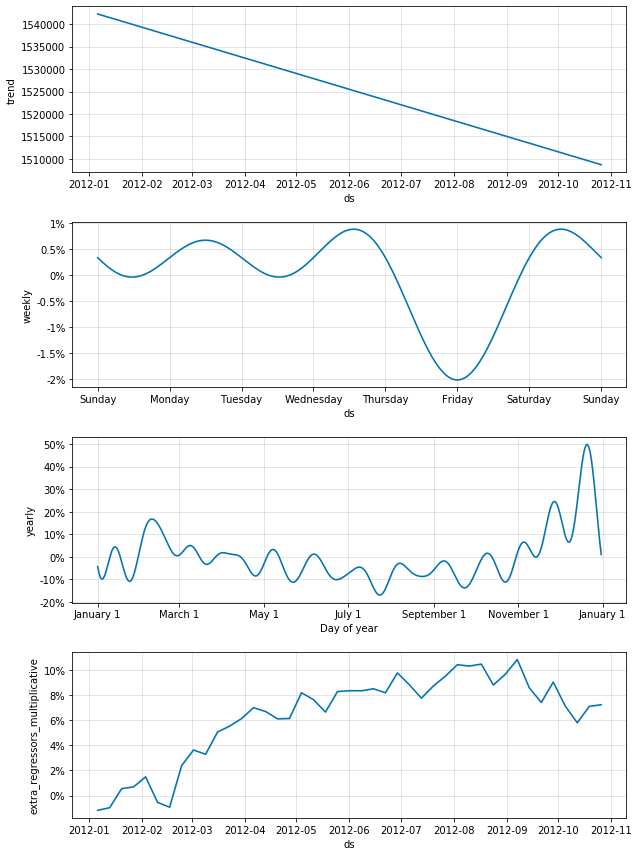

In [39]:
pd.plotting.register_matplotlib_converters()
f = m.plot_components(forecast)

<Figure size 1296x432 with 0 Axes>

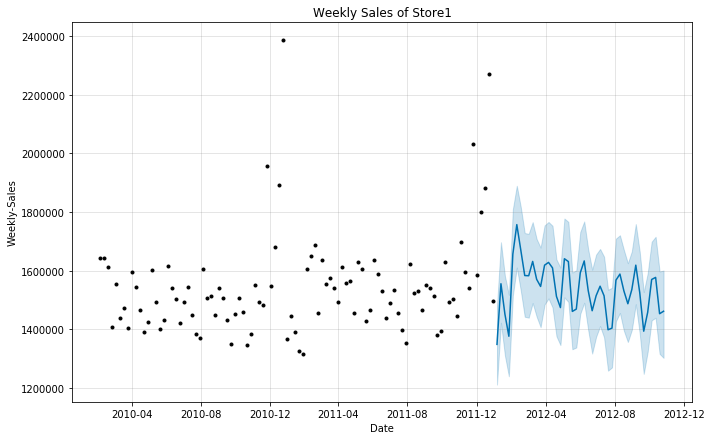

In [40]:
plt.figure(figsize=(18, 6))
m.plot(forecast, xlabel = 'Date', ylabel = 'Weekly-Sales')
plt.title('Weekly Sales of Store1');

In [47]:
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2012-01-06  1.542274e+06  1.211948e+06  1.478769e+06  1.542274e+06   
1  2012-01-13  1.541475e+06  1.422784e+06  1.697126e+06  1.541475e+06   
2  2012-01-20  1.540677e+06  1.311058e+06  1.582351e+06  1.540676e+06   
3  2012-01-27  1.539878e+06  1.240174e+06  1.517981e+06  1.539878e+06   
4  2012-02-03  1.539079e+06  1.515288e+06  1.809554e+06  1.539079e+06   
5  2012-02-10  1.538281e+06  1.610856e+06  1.889736e+06  1.538280e+06   
6  2012-02-17  1.537482e+06  1.532665e+06  1.817610e+06  1.537481e+06   
7  2012-02-24  1.536684e+06  1.443114e+06  1.728476e+06  1.536682e+06   
8  2012-03-02  1.535885e+06  1.440028e+06  1.725878e+06  1.535884e+06   
9  2012-03-09  1.535086e+06  1.489900e+06  1.765701e+06  1.535085e+06   
10 2012-03-16  1.534288e+06  1.443512e+06  1.708465e+06  1.534286e+06   
11 2012-03-23  1.533489e+06  1.407747e+06  1.678802e+06  1.533487e+06   
12 2012-03-30  1.532691e+06  1.484744e+06  1.754465e+06  1.532688e+06   
13 2012-04-06  1.531892e+06  1.505583e+06  1.766335e+06  1.531889e+06   
14 2012-04-13  1.531094e+06  1.474966e+06  1.753371e+06  1.531091e+06   
15 2012-04-20  1.530295e+06  1.376752e+06  1.638532e+06  1.530292e+06   
16 2012-04-27  1.529496e+06  1.346471e+06  1.610700e+06  1.529493e+06   
17 2012-05-04  1.528698e+06  1.509198e+06  1.778019e+06  1.528694e+06   
18 2012-05-11  1.527899e+06  1.493755e+06  1.766561e+06  1.527895e+06   
19 2012-05-18  1.527101e+06  1.332282e+06  1.593973e+06  1.527096e+06   
20 2012-05-25  1.526302e+06  1.338353e+06  1.601347e+06  1.526297e+06   
21 2012-06-01  1.525503e+06  1.453129e+06  1.732235e+06  1.525498e+06   
22 2012-06-08  1.524705e+06  1.490754e+06  1.768015e+06  1.524699e+06   
23 2012-06-15  1.523906e+06  1.397820e+06  1.673083e+06  1.523900e+06   
24 2012-06-22  1.523108e+06  1.317629e+06  1.603590e+06  1.523101e+06   
25 2012-06-29  1.522309e+06  1.374942e+06  1.655144e+06  1.522302e+06   
26 2012-07-06  1.521511e+06  1.411475e+06  1.674302e+06  1.521503e+06   
27 2012-07-13  1.520712e+06  1.372746e+06  1.648048e+06  1.520704e+06   
28 2012-07-20  1.519913e+06  1.259331e+06  1.535076e+06  1.519905e+06   
29 2012-07-27  1.519115e+06  1.270344e+06  1.541980e+06  1.519106e+06   
30 2012-08-03  1.518316e+06  1.427657e+06  1.709551e+06  1.518307e+06   
31 2012-08-10  1.517518e+06  1.456155e+06  1.720994e+06  1.517508e+06   
32 2012-08-17  1.516719e+06  1.395465e+06  1.670863e+06  1.516709e+06   
33 2012-08-24  1.515920e+06  1.357038e+06  1.625607e+06  1.515910e+06   
34 2012-08-31  1.515122e+06  1.398403e+06  1.666304e+06  1.515111e+06   
35 2012-09-07  1.514323e+06  1.485933e+06  1.759098e+06  1.514312e+06   
36 2012-09-14  1.513525e+06  1.384465e+06  1.664039e+06  1.513513e+06   
37 2012-09-21  1.512726e+06  1.248430e+06  1.527230e+06  1.512714e+06   
38 2012-09-28  1.511928e+06  1.323614e+06  1.591424e+06  1.511915e+06   
39 2012-10-05  1.511129e+06  1.430939e+06  1.698925e+06  1.511116e+06   
40 2012-10-12  1.510330e+06  1.439663e+06  1.715735e+06  1.510317e+06   
41 2012-10-19  1.509532e+06  1.316902e+06  1.597498e+06  1.509518e+06   
42 2012-10-26  1.508733e+06  1.302904e+06  1.600634e+06  1.508719e+06   

     trend_upper       CPI  CPI_lower  CPI_upper  Fuel_Price  \
0   1.542274e+06  0.041287   0.041287   0.041287    0.001613   
1   1.541475e+06  0.042484   0.042484   0.042484    0.003729   
2   1.540677e+06  0.043110   0.043110   0.043110    0.003871   
3   1.539878e+06  0.043735   0.043735   0.043735    0.004318   
4   1.539080e+06  0.044360   0.044360   0.044360    0.005742   
5   1.538282e+06  0.044986   0.044986   0.044986    0.006739   
6   1.537483e+06  0.046064   0.046064   0.046064    0.008794   
7   1.536685e+06  0.047481   0.047481   0.047481    0.009709   
8   1.535886e+06  0.048898   0.048898   0.048898    0.011235   
9   1.535088e+06  0.050316   0.050316   0.050316    0.012028   
10  1.534290e+06  0.051340   0.051340   0.051340    0.013350   
11  1.533491e+06  0.051841   0

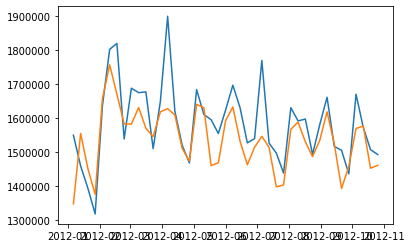

In [50]:
from matplotlib.pyplot import plot
plot(data_test['ds'].unique(),data_test['y'].unique())
plot(data_test['ds'].unique(),forecast['yhat'].unique())

In [ ]:
rmse value calculate